# Getting Ahead of the Headline 
Analyzing employee emails using Natural Language Processing, Sentiment Analysis, and Time Series Analysis<br>
>Paige Guajardo<br>
Rajaram Gautam<br>
Stephanie Jones<br>
Kaniela Denis<br><br>

# Executive Summary
## Background
Enron Corporation was a major American energy, commodities, and services company that declared bankruptcy in December 2001 after over a decade of fraudulent accounting practices. During an error of more lenient financial regulations and high market speculation, Enron hid its financial losses in special purposes entities, making it appear much more profitable on paper than it actually was.<br><br>

Enron has become synonymous with willful corporate fraud and corruption. The scandal also brought into question the accounting practices and activities of many corporations in the United States and was a factor in the enactment of the Sarbanes-Oxley Act of 2002. The scandal also affected the greater business world by causing the dissolution of the Arthur Andersen accounting firm, which had been Enron's main auditor for years.
## About the Project
In this unsupervised machine learning project we are exploring and analyzing Enron employee emails. We are using topic modeling, sentiment analysis, and time series analysis to identify trends in communication themes over time.

## Project Goal
For our MVP we are looking at a corpus of 5,575 emails sent by people of interest, as identified by the official congressional report on the role of Enron's board of directors (https://bit.ly/3Hjz5rI) on the collapse of the company.
#### Data Dictionary
variable | dtype | description
:-- | :-- | :--
`date` | datetime | date email was sent
`file` | object | email file path (storage)
`sender` | object | email sender email address
`subject` | object | text of email subject
`content` | object | raw email content
`lemmatize` | object | cleaned and lemmatized email content
`sentiment` | float | sentiment score
`polarity` | float | measure of email sentiment, -1 (neg) to 1 (pos)
`subjectivity` | float | measure of email subjectivity, 0 (obj), 1 (sub)
`poi` | bool | True == Person of Interest, someone connected to investigation (more on this below)
`is_internal` | bool | True == email was sent from Enron address

## Initial Hypothesis
Our initial hypothesis is that there will be distinct trends in email topics and sentiment over time. 

# Data Science Pipeline

## 00_planning
We used a [Trello Board](https://trello.com/b/osnQZqjJ/enronnlp-project) for planning.

## 01_wrangle
1. Acquire<br>
Data source: [Kaggle](https://www.kaggle.com/wcukierski/enron-email-dataset), Will Cukierski | 2016
>To acquire the raw data used for this project, download the csv file from the link above to your local drive and used the `pandas` library to read to a DataFrame. For instructions on downloading `pandas` see [README.md](https://github.com/Enron-Discussion-NLP/Capstone/blob/014d19cd2bfe023333f67e7bf5c30a1f13858e11/README.md), Steps to Recreate, Step 4. 

2. Clean
Steps for Data Cleaning
>- Import `email.parser` library for text parsing (see [README.md](https://github.com/Enron-Discussion-NLP/Capstone/blob/014d19cd2bfe023333f67e7bf5c30a1f13858e11/README.md), Steps to Recreate, Step 4) and parse email contents
>- apply .lower(), .strip(), regex, normalize(), and encode() function to email body contents 
>- tokenize email body contents
>- remove stop words
>- stem and lemmatize
>- changed date column dtype to datetime
>- dropped nulls

3. Engineered Features
The following sentiment score algorithms were applied to cleaned email body contents see [README.md](https://github.com/Enron-Discussion-NLP/Capstone/blob/014d19cd2bfe023333f67e7bf5c30a1f13858e11/README.md), Steps to Recreate, Step 4
>- Vader Sentiment Intensity Analyzer 
>- Textblob Polarity and Subjectivity
>- `is_internal` (`True` if email has @enron in address)
>- `poi` see [README.md](https://github.com/Enron-Discussion-NLP/Capstone/blob/014d19cd2bfe023333f67e7bf5c30a1f13858e11/README.md) for additional information on Persons of Interest

In [11]:
import pandas as pd
import datetime

# reading in csv file of wrangled data
df = pd.read_csv('clean.csv').drop(columns = ['Unnamed: 0'])

# correcting date dtype to datetime
df.date = pd.to_datetime(df.date)

# dropping nulls in lemm column
df.lemmatize.dropna(inplace = True)

#renaming sentiment col >> intensity
df.rename(columns = {'sentiment':'intensity'}, inplace = True)

print(f'This file contains {df.shape[0]} rows of data and {df.shape[1]} columns.')
print(f'There are {df.lemmatize.isna().sum()} null values in cleaned text column.')

This file contains 516796 rows of data and 12 columns.
There are 283 null values in cleaned text column.


In [12]:
# preview
df.head()

,date,file,sender,subject,content,lemmatize,intensity,polarity,subjectivity,poi,is_internal,year
0,2001-05-14,allen-p/_sent_mail/1.,phillip.allen@enron.com,NaN,Here is our forecast\n\n,forecast,0.0000,0.00,0.000000,False,True,2001
1,2001-05-04,allen-p/_sent_mail/10.,phillip.allen@enron.com,Re:,Traveling to have a business meeting takes the...,traveling business meeting take fun trip espec...,0.9313,0.15,0.613333,False,True,2001
2,2000-10-18,allen-p/_sent_mail/100.,phillip.allen@enron.com,Re: test,test successful. way to go!!!,test successful way go,0.5859,0.75,0.950000,False,True,2000
3,2000-10-23,allen-p/_sent_mail/1000.,phillip.allen@enron.com,NaN,"Randy,\n\n Can you send me a schedule of the s...",randy send schedule salary level everyone sche...,0.0000,0.00,0.000000,False,True,2000
4,2000-08-31,allen-p/_sent_mail/1001.,phillip.allen@enron.com,Re: Hello,Let's shoot for Tuesday at 11:45.,let ' shoot tuesday 1145,-0.3400,0.00,0.000000,False,True,2000


## 02_explore

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516796 entries, 0 to 516795
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          516796 non-null  datetime64[ns]
 1   file          516796 non-null  object        
 2   sender        516796 non-null  object        
 3   subject       497681 non-null  object        
 4   content       516796 non-null  object        
 5   lemmatize     516513 non-null  object        
 6   intensity     516796 non-null  float64       
 7   polarity      516796 non-null  float64       
 8   subjectivity  516796 non-null  float64       
 9   poi           516796 non-null  bool          
 10  is_internal   516796 non-null  bool          
 11  year          516796 non-null  int64         
dtypes: bool(2), datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 40.4+ MB


### Univariate Exploration
What are the distributions of each of the continuous and boolean variables?

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

cont_vars = ['intensity', 'polarity', 'subjectivity', 'year']
bool_vars = ['poi', 'is_internal']

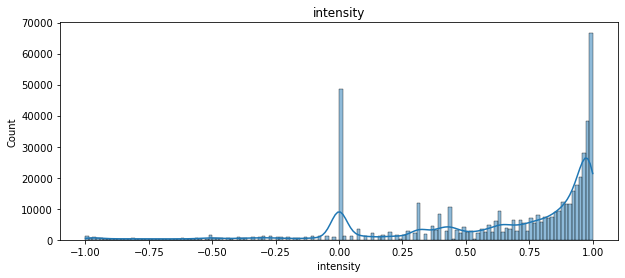

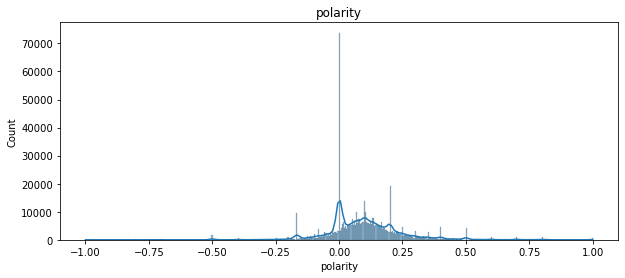

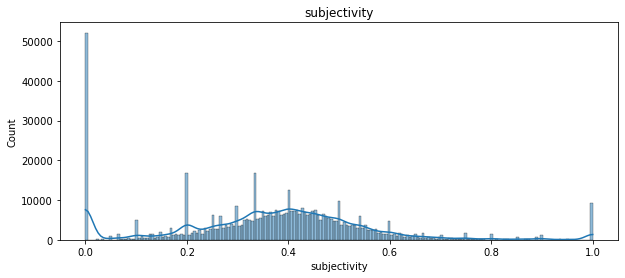

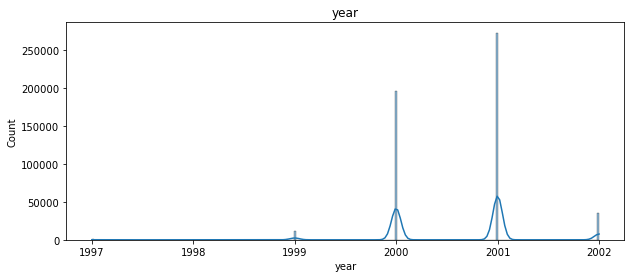

In [15]:
# distributions of continuous variables
for var in cont_vars:
    plt.figure(figsize = (10, 4))
    sns.histplot(data = df, x = var, kde = True)
    plt.title(var)
    plt.show()

- sentiment mostly left skewed, polarity and subjectivity normal*ishly* distributed
- most emails in 2000 and 2001

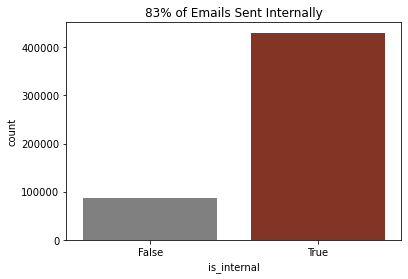

In [16]:
# distributions of bools variables

# internal vs not internal emails
plt.figure(figsize = (6, 4))
sns.countplot(data = df, x = 'is_internal', palette = ['grey', '#912a15'])
plt.title(f'{round(df.is_internal.mean()*100)}% of Emails Sent Internally')
plt.show()

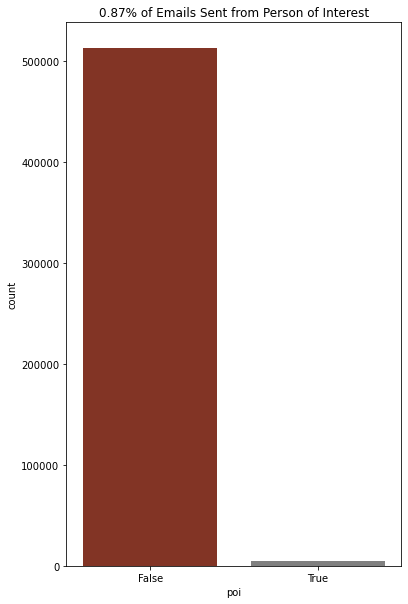

In [17]:
# emails sent from a non-person of of interest vs person of interest
plt.figure(figsize = (6, 10))
sns.countplot(data = df, x = 'poi', palette = ['#912a15', 'grey'])
plt.title(f'{round(df.poi.mean()*100, 2)}% of Emails Sent from Person of Interest')
plt.show()

- most emails were sent from within Enron
- most emails were *not* sent from a person of interest

#### Takeaways from Univariate Exploration
This is a very large corpus of employee emails. For the mvp we will focus only on the persons of interest from the years 1999 - 2002 for further exploratory analysis.

In [18]:
# creating a filtered df for poi and years and dropping poi column for later
poi_df = df[(df.poi == True) & (df.year >= 1999) & (df.year <= 2002)].drop(columns = ['poi'])

### Bivariate Exploration

#### What are the distributions of each measure of sentiment by year?

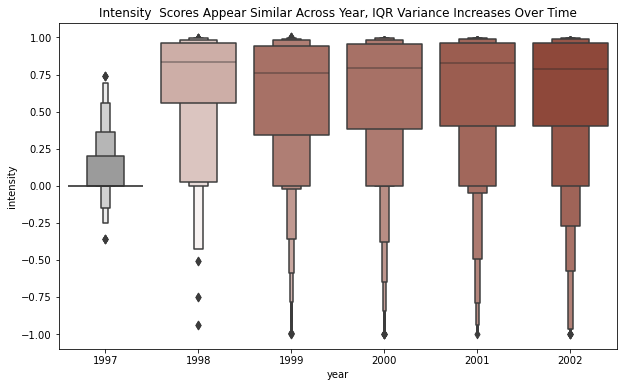

In [19]:
# plotting intensity score by year to look at median, IQR, and outliers
plt.figure(figsize = (10, 6))
sns.boxenplot(data = df, x = 'year', y = 'intensity', palette = ['grey', '#d3aaa1', '#b26a5b', '#b26a5b', \
                                                                 '#a75544', '#9c3f2c'])
plt.title('Intensity  Scores Appear Similar Across Year, IQR Variance Increases Over Time')
plt.show()

In [25]:
poi_df.head(1)

,date,file,sender,subject,content,lemmatize,intensity,polarity,subjectivity,is_internal,year
1037,2000-12-05,allen-p/all_documents/50.,tim.belden@enron.com,"New Generation, Nov 30th",---------------------- Forwarded by Tim Belden...,forwarded tim beldenhouect 12052000 0544 krist...,0.0,-0.015152,0.393939,True,2000


In [27]:
# Making a new column
poi_df['year_2000'] = np.where(poi_df['year'] == 2000, True, False)
# poi_df.head()

### Statistical Test
- HO: Sentiment Score of Year 2000 is equal to Sentiment Year of 2001
- H(a): Sentiment Score of Year 2000 > Sentiment Score of Year 2001

In [30]:
# Function for 1 tailed 2 sample t test
from scipy import stats
from scipy.stats import ttest_ind_from_stats
import numpy as np
α = 0.05

def stats_t_test_1tail_2sample_inten():
    # creating series for intensitys for 2000 and 2001
    year_2000 = poi_df[poi_df.year_2000 == True].intensity
    year_2001 = poi_df[poi_df.year_2000 == False].intensity
    t, p = stats.ttest_ind(year_2000, year_2001, equal_var= False)

    t, p/2, α
    
    if (p/2 < α) & (t > 0):
        print('We reject the null hypothesis')
    else:
        print('We fail to reject the null hypothesis')

In [31]:
stats_t_test_1tail_2sample_inten()

We fail to reject the null hypothesis


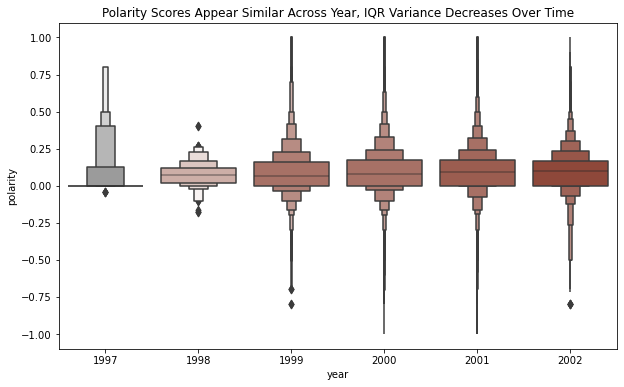

In [10]:
# plotting polarity score by year to look at median, IQR, and outliers
plt.figure(figsize = (10, 6))
sns.boxenplot(data = df, x = 'year', y = 'polarity', palette = ['grey', '#d3aaa1', '#b26a5b', '#b26a5b', \
                                                                 '#a75544', '#9c3f2c'])
plt.title('Polarity Scores Appear Similar Across Year, IQR Variance Decreases Over Time')
plt.show()

### Statistical Test
- HO: polarity Score of Year 2000 is equal to polarity Year of 2001
- H(a): polarity Score of Year 2000 > polarity Score of Year 2001

In [32]:
def stats_t_test_1tail_2sample_senti_pola():
    """
    This function do t-test for 1 tail with 2 samples for polarity.
    """
    # creating series for polaritys for 2000 and 2001
    year_2000 = poi_df[poi_df.year_2000 == True].polarity
    year_2001 = poi_df[poi_df.year_2000 == False].polarity
    t, p = stats.ttest_ind(year_2000, year_2001, equal_var= False)

    t, p/2, α
    
    if (p/2 < α) & (t > 0):
        print('We reject the null hypothesis')
    else:
        print('We fail to reject the null hypothesis')
        

In [33]:
stats_t_test_1tail_2sample_senti_pola()

We fail to reject the null hypothesis


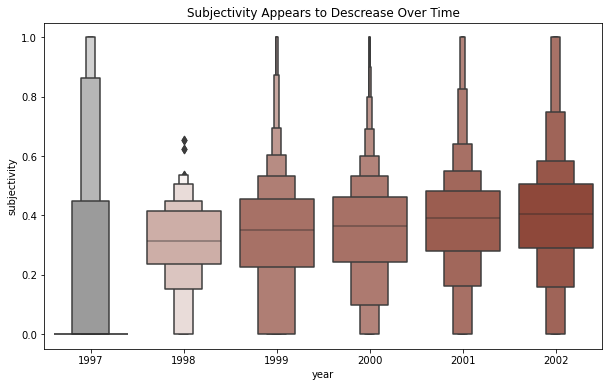

In [11]:
# plotting subjectivity score by year to look at median, IQR, and outliers
plt.figure(figsize = (10, 6))
sns.boxenplot(data = df, x = 'year', y = 'subjectivity', palette = ['grey', '#d3aaa1', '#b26a5b', '#b26a5b', \
                                                                 '#a75544', '#9c3f2c'])
plt.title('Subjectivity Appears to Descrease Over Time')
plt.show()

### Statistical Test
- HO: polarity Score of Year 2000 is equal to polarity Year of 2001
- H(a): polarity Score of Year 2000 > polarity Score of Year 2001

In [38]:
def stats_t_test_1tail_2sample_sub():
    """
    This function do t-test for 1 tail with 2 samples for subjectivity.
    """
    # creating series for subjectivitys for 2000 and 2001
    year_2000 = poi_df[poi_df.year_2000 == True].subjectivity
    year_2001 = poi_df[poi_df.year_2000 == False].subjectivity
    t, p = stats.ttest_ind(year_2000, year_2001, equal_var= False)

    t, p/2, α
    
    if (p/2 < α) & (t > 0):
        print('We reject the null hypothesis')
    else:
        print('We fail to reject the null hypothesis')
        

In [37]:
stats_t_test_1tail_2sample_sub()

We reject the null hypothesis


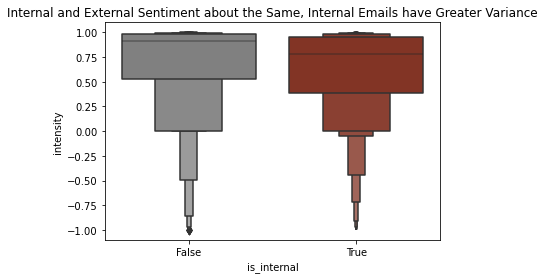

In [12]:
# do internal emails have higher or lower sentiment scores than external emails?
sns.boxenplot(data = df, x = 'is_internal', y = 'intensity', palette = ['grey', '#912a15'])
plt.title('Internal and External Sentiment about the Same, Internal Emails have Greater Variance')
plt.show()

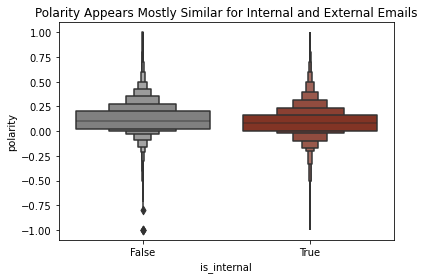

In [13]:
sns.boxenplot(data = df, x = 'is_internal', y = 'polarity', palette = ['grey', '#912a15'])
plt.title('Polarity Appears Mostly Similar for Internal and External Emails')
plt.show()

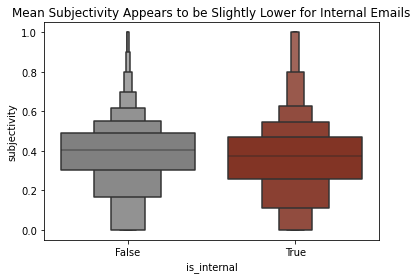

In [14]:
sns.boxenplot(data = df, x = 'is_internal', y = 'subjectivity', palette = ['grey', '#912a15'])
plt.title('Mean Subjectivity Appears to be Slightly Lower for Internal Emails')
plt.show()

#### Takeaways from Bivariate Exploration

### Multivariate Analysis
#### Is there any correlation between variables?

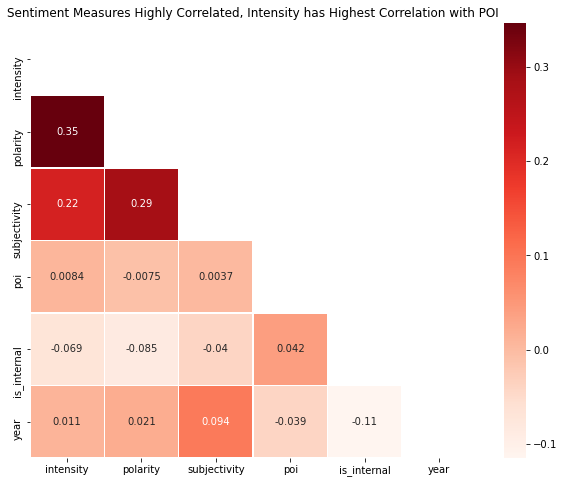

In [98]:
import numpy as np

# Creat correlation table and heatmap
corr_table =  df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_table, cmap='Reds', annot=True, linewidth=0.5, mask= np.triu(corr_table))
plt.title('Sentiment Measures Highly Correlated, Intensity has Highest Correlation with POI')
plt.show()

#### Takeaways from Multivariate Analysis
Measures of Sentiment Appear to be Correlated
- Highest correlatoin with polarity and intensity which makes sense since they are similar measures for sentiment
- Next Highest correlation is with polarity and subjectivity
- Next highest correlation is with intensity and subjectivity.

### Time Series Analysis
#### How does the aggregate sum of `intensity` change over time?

In [43]:
# reading in date data csv
ts = pd.read_csv('date.csv')

# setting date col to datetime 
ts.date = pd.to_datetime(ts.date)

# making date col index
ts = ts.set_index('date')

# renaming sentiment col >> intensity
ts.rename(columns = {'sentiment': 'intensity'}, inplace = True)

# preview ts df
ts.head()

,date,sentiment,polarity,subjectivity,year,month
0,1999-01-04 10:21:00+00:00,0.2023,0.000000,0.000000,1999,1
1,1999-01-04 10:21:00+00:00,0.2023,0.000000,0.000000,1999,1
2,1999-01-04 12:11:00+00:00,0.3182,0.016667,0.266667,1999,1
3,1999-01-04 12:11:00+00:00,0.3182,0.016667,0.266667,1999,1
4,1999-01-05 06:36:00+00:00,0.9895,0.076871,0.329783,1999,1


In [50]:
# value counts for each year
pd.DataFrame(ts_df.year.value_counts()).sort_index()

,year
1999,11144
2000,196100
2001,272964
2002,35974


In [72]:
# creating a ts for each year
ts_1999 = ts[ts.year == 1999]
ts_2000 = ts[ts.year == 2000]
ts_2001 = ts[ts.year == 2001]
ts_2002 = ts[ts.year == 2002]


# verifying value counts for each year
ts_1999.shape[0], ts_2000.shape[0], ts_2001.shape[0], ts_2002.shape[0]

(11144, 196100, 272964, 35974)

In [75]:
# creating dfs grouped by date for plotting
ts_1999_grouped_intensity = ts_1999.groupby('date').intensity.sum().reset_index()
ts_2000_grouped_intensity = ts_2000.groupby('date').intensity.sum().reset_index()
ts_2001_grouped_intensity = ts_2001.groupby('date').intensity.sum().reset_index()
ts_2002_grouped_intensity = ts_2002.groupby('date').intensity.sum().reset_index()


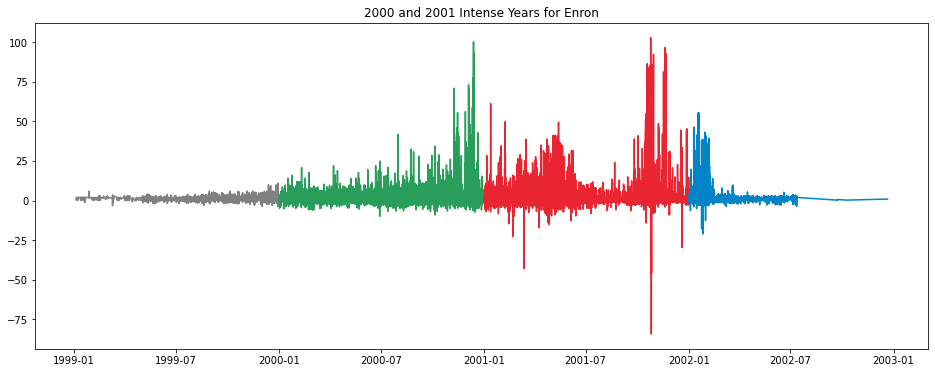

In [83]:
# plotting insensity score by date
plt.figure(figsize = (16, 6))

plt.plot(ts_1999_grouped_intensity.date, ts_1999_grouped_intensity.intensity, color = 'grey')
plt.plot(ts_2000_grouped_intensity.date, ts_2000_grouped_intensity.intensity, color = '#299e5bff')
plt.plot(ts_2001_grouped_intensity.date, ts_2001_grouped_intensity.intensity, color = '#e92532ff')
plt.plot(ts_2002_grouped_intensity.date, ts_2002_grouped_intensity.intensity, color = '#0084c7ff')

plt.title('2000 and 2001 Intense Years for Enron')
plt.show()

#### Is there any seasonality in the monthly `intensity` score? 

In [ ]:
# seasonal subseries plot shows the change year-over-year within each month.
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

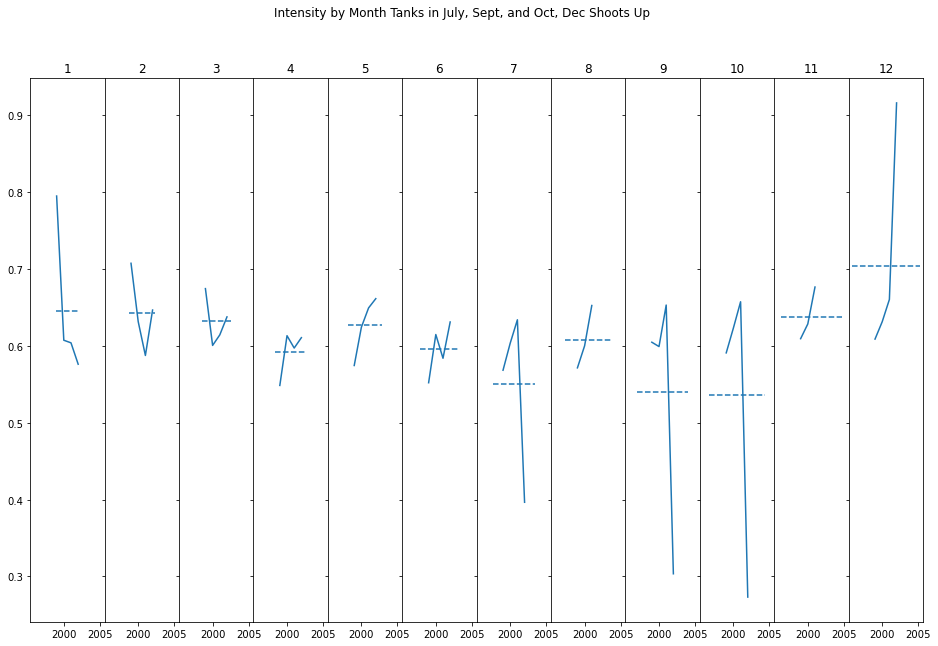

In [94]:
# getting intensity series for seasonal plot
y = ts.intensity

#A seasonal subseries plot shows the change year-over-year within each month.
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

#plotting seasonal chart
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True, figsize=(16,10))
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')
    
fig.suptitle('Intensity by Month Tanks in July, Sept, and Oct, Dec Shoots Up') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

#### Takeaways from Time Series Analysis

>- In 2000 Intensity scores have higher than normal positive spikes and in 2001 higher than normal positive and negative spikes. Based on what was going on (2000) being the year before Enron was caught and (2001) being the year they were caught this makes sense.
>- Anyone investigating alleged mismanagement or suspicious activity could look for these abnormal spikes as indicators of 
    1. When persons of interest may have been engaging in deceptive behavior that had positive impacts on the general population
    2. When the general population began to become aware of the deceptive practices 

Post MVP we would like to zoom in to those spikes and see in finer detail was going on those quarters/months/dates (and possibly, times)

## 03_model
We used the `BERTopic` topic modeling algorithms to test our hypothesis, that we could identify unique themes in the email corpus by year. The functions used for this model can be found in the `model.py` module.
<hr>

*Note: there is a `umap` function we wanted to use for reproducability, at the time the notebook is being prepared for mvp submission, when tested it is not giving us the same results. We will keep the code in our notebook for post-mvp troubleshooting. The results are similar enough to proceed with the topic modeling analysis.*

In [ ]:
import model as m

# topics for 2000
m.get_topics(df[df.year == 2000])

In [ ]:
# topics for 2001

# # dropping x6 nulls from lemm text col for model to run without error
# df = df[df.lemmatize.isnull()==False]

m.get_topics(df[df.year == 2001])

In [ ]:
# topics for 2002
m.get_topics(df[df.year == 2002])